In [1]:
import sys
from astropy.io import fits
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import wdwarfdate 
#%matplotlib notebook

# Check code

# Comparison with Cummings 2018

In [23]:
cummings_2018 = Table.read('Catalogs/Cummings2018.csv',format='csv')

In [24]:
def IFMR_mist(initial_mass):
    if(not isinstance(initial_mass,np.ndarray)):
        initial_mass = np.array([initial_mass])
    N = len(initial_mass)
    final_mass = np.ones(N)*np.nan
    for i in range(N):
        if(initial_mass[i] > 0.83 and initial_mass[i] <= 2.85):
            final_mass[i] = 0.08*initial_mass[i] + 0.489
        elif(initial_mass[i] > 2.85 and initial_mass[i] <= 3.60):
            final_mass[i] = 0.187*initial_mass[i] + 0.184
        elif(initial_mass[i] > 3.60 and initial_mass[i] <= 7.20):
            final_mass[i] = 0.107*initial_mass[i] + 0.471
    return final_mass

def IFMR_mist_r(final_mass):
    if(not isinstance(final_mass,np.ndarray)):
        final_mass = np.array([final_mass])
        
    N = len(final_mass)
    initial_mass = np.ones(N)*np.nan
    for j in range(N):
        if((0.5554 < final_mass[j]) and (final_mass[j] <= 0.717)):
            initial_mass[j] = (final_mass[j] - 0.489)/0.08
        elif((0.71695 < final_mass[j]) and (final_mass[j] <= 0.8572)):
            initial_mass[j] = (final_mass[j] - 0.184)/0.187
        elif((0.8562 < final_mass[j]) and (final_mass[j] <= 1.2414)):
            initial_mass[j] = (final_mass[j] - 0.471)/0.107
    return initial_mass

In [25]:
teff = cummings_2018['Teff']
teff_err = cummings_2018['Teff_err']
logg = cummings_2018['logg']
logg_err = cummings_2018['logg_err']
final_mass = cummings_2018['Mf']
final_mass_err = cummings_2018['Mf_err']
tcool = cummings_2018['Tcool']*1e6
tcool_err_high = cummings_2018['Tcool_err_high']*1e6
tcool_err_low = cummings_2018['Tcool_err_low']*1e6
initial_mass = cummings_2018['Mi_mist']
initial_mass_err_low = cummings_2018['Mi_mist_err_low']
initial_mass_err_high = cummings_2018['Mi_mist_err_high']
total_age = cummings_2018['Age_mist']*1e6
total_age_err = cummings_2018['Age_mist_err']*1e6

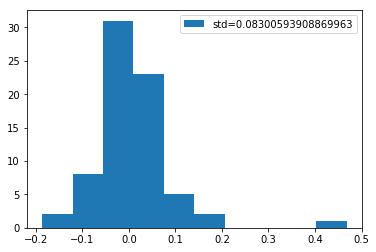

In [29]:
plt.hist(final_mass-IFMR_mist(initial_mass),label='std={}'.format(np.nanstd(final_mass-IFMR_mist(initial_mass))))
plt.legend()
plt.show()

In [9]:
result_cummings_2018_table_w_prior = Table.read('cummings_2018_results_bayesian.fits')
cummings_2018_results_bayesian_w_delta_m = Table.read('cummings_2018_results_bayesian_w_delta_m.fits')
results_freq = wdwarfdate.calc_wd_age(teff,teff_err,logg,logg_err,n_mc=10000,vvcrit='0.0',return_distributions=True)

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


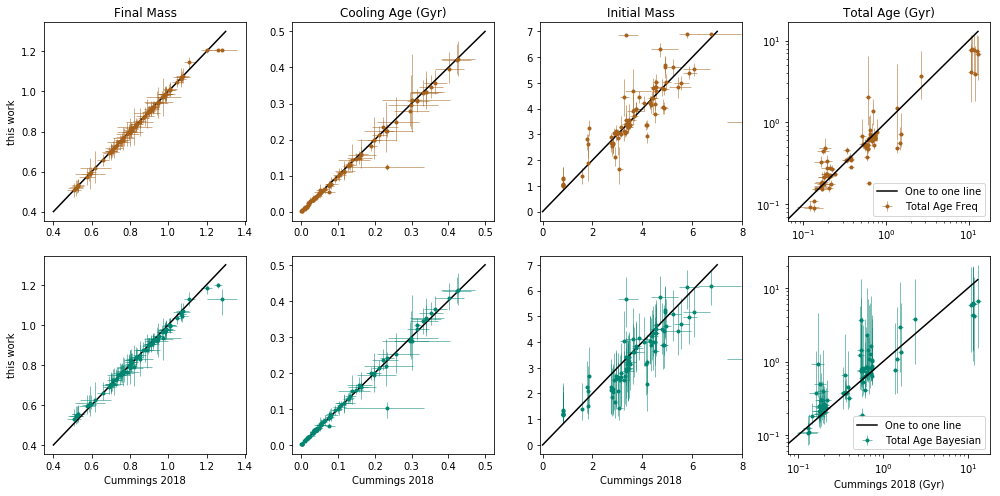

In [10]:
elinewidth = 0.5
color1 = '#a6611a'
color2 = '#018571'

f,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,figsize=(14,7))
x = np.linspace(0.4,1.3)
ax1.errorbar(final_mass,results_freq['final_mass_median'],
             xerr=final_mass_err,
             yerr=(results_freq['final_mass_err_low'],
                   results_freq['final_mass_err_high']),fmt='.',elinewidth = elinewidth, color = color1)
ax1.plot(x,x,color='k',zorder=2)
ax1.set_title('Final Mass')
ax1.set_ylabel('this work')

ax5.errorbar(final_mass,cummings_2018_results_bayesian_w_delta_m['final_mass_median'],
             xerr=final_mass_err,
             yerr=(cummings_2018_results_bayesian_w_delta_m['final_mass_err_low'],
                   cummings_2018_results_bayesian_w_delta_m['final_mass_err_high']),fmt='.', 
             elinewidth = elinewidth, color = color2)
ax5.plot(x,x,color='k',zorder=2)
ax5.set_xlabel('Cummings 2018')
ax5.set_ylabel('this work')


x = np.linspace(0,0.5)
ax2.errorbar(tcool/1e9,results_freq['cooling_age_median']/1e9,
             xerr=(tcool_err_low/1e9,tcool_err_high/1e9),
             yerr=(results_freq['cooling_age_err_low']/1e9,
                   results_freq['cooling_age_err_high']/1e9),fmt='.',
             elinewidth = elinewidth, color = color1)
ax2.plot(x,x,color='k',zorder=2)
ax2.set_title('Cooling Age (Gyr)')

ax6.errorbar(tcool/1e9,cummings_2018_results_bayesian_w_delta_m['cooling_age_median'],
             xerr=(tcool_err_low/1e9,tcool_err_high/1e9),
             yerr=(cummings_2018_results_bayesian_w_delta_m['cooling_age_err_low'],
                   cummings_2018_results_bayesian_w_delta_m['cooling_age_err_high']),fmt='.',
             elinewidth = elinewidth, color = color2)
ax6.plot(x,x,color='k',zorder=2)
ax6.set_xlabel('Cummings 2018')


x = np.linspace(0,7)
ax3.errorbar(initial_mass,results_freq['initial_mass_median'],
             xerr=(initial_mass_err_low,initial_mass_err_high),
             yerr=(results_freq['initial_mass_err_low'],
                   results_freq['initial_mass_err_high']),fmt='.',
             elinewidth = elinewidth, color = color1)
ax3.plot(x,x,color='k',zorder=2)
ax3.set_xlim(-0.1,8)
ax3.set_title('Initial Mass')

ax7.errorbar(initial_mass,cummings_2018_results_bayesian_w_delta_m['initial_mass_median'],
             xerr=(initial_mass_err_low,initial_mass_err_high),
             yerr=(cummings_2018_results_bayesian_w_delta_m['initial_mass_err_low'],
                   cummings_2018_results_bayesian_w_delta_m['initial_mass_err_high']),fmt='.',
             elinewidth = elinewidth, color = color2)
ax7.plot(x,x,color='k',zorder=2)
ax7.set_xlim(-0.1,8)
ax7.set_xlabel('Cummings 2018')


random_shift = np.random.rand(len(total_age))*total_age*0.2 - (total_age*0.2/2)
x = np.linspace(0,13)

ax4.errorbar((total_age+random_shift)/1e9,results_freq['total_age_median']/1e9,
             xerr=total_age_err/1e9,
             yerr=(results_freq['total_age_err_low']/1e9,
                   results_freq['total_age_err_high']/1e9),
             label='Total Age Freq',zorder=2,fmt='.',
             elinewidth = elinewidth, color = color1)
ax4.plot(x,x,color='k',zorder=3,label='One to one line')
ax4.legend(loc=4)
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_title('Total Age (Gyr)')

random_shift = np.random.rand(len(total_age))*total_age*0.2 - (total_age*0.2/2)
ax8.errorbar((total_age+random_shift)/1e9,
             cummings_2018_results_bayesian_w_delta_m['total_age_median'],
             xerr=total_age_err/1e9,
             yerr=(cummings_2018_results_bayesian_w_delta_m['total_age_err_low'],
                   cummings_2018_results_bayesian_w_delta_m['total_age_err_high']),
             label='Total Age Bayesian',fmt='.', 
             elinewidth = elinewidth, color = color2)

ax8.plot(x,x,color='k',zorder=3,label='One to one line')
ax8.legend(loc=4)
ax8.set_xlabel('Cummings 2018 (Gyr)')
ax8.set_yscale('log')
ax8.set_xscale('log')

plt.tight_layout()

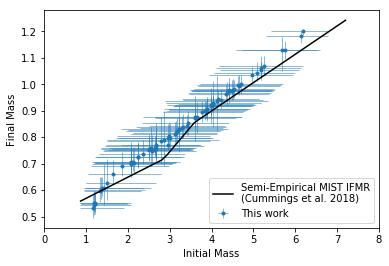

In [22]:
elinewidth = 0.5
x = np.linspace(0.87,7.20)
plt.errorbar(cummings_2018_results_bayesian_w_delta_m['initial_mass_median'],
             cummings_2018_results_bayesian_w_delta_m['final_mass_median'],
             xerr=(cummings_2018_results_bayesian_w_delta_m['initial_mass_err_low'],
                   cummings_2018_results_bayesian_w_delta_m['initial_mass_err_high']),
             yerr=(cummings_2018_results_bayesian_w_delta_m['final_mass_err_low'],
                   cummings_2018_results_bayesian_w_delta_m['final_mass_err_high']),
             fmt='.',zorder=0,elinewidth = elinewidth,
             label='This work')
plt.plot(x,IFMR_mist(x),color='k',zorder=4,label='Semi-Empirical MIST IFMR\n(Cummings et al. 2018)')
plt.xlabel('Initial Mass')
plt.ylabel('Final Mass')
plt.xlim(0,8)
plt.legend(loc=4)

# Gagne

In [10]:
#data_gagne = [np.log10(44*1e6),np.log10((81)*1e6), np.log10(117*1e6), 7.8, 1.28]

#result_gagne = wdwarfdate.calc_bayesian_wd_age(42700,800,9.20,0.07,n_mc=1000,model_wd='DA',feh='p0.00',vvcrit='0.0',
#                                               model_ifmr = 'Cummings_2018_PARSEC',init_params = [], 
#                                               comparison = data_gagne, 
#                                               n = 100, high_perc = 84, low_perc = 16, plot = True, 
#                                               save_dist = True)


/Users/rociokiman/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


# Comparison with Garces 2011

In [13]:
garces2011 = Table.read('Catalogs/Garces2011.csv')

In [14]:
mask_good = garces2011['Good'] == 1
garces2011 = garces2011[mask_good]

In [15]:
result_garces2011_freq = wdwarfdate.calc_wd_age(garces2011['Teff'],garces2011['e_Teff'],
                                                garces2011['logg'],garces2011['e_logg'],
                                                n_mc=10000,return_distributions=True)
result_garces2011_table = Table.read('Garces2011_results_bayesian_w_delta_m.fits')

In [30]:
garces2011.columns

<TableColumns names=('WD','Teff','e_Teff','logg','e_logg','final_mass','e_final_mass','tcool','e_tcool','Minitial_mass','e_initial_mass','ms_age','e_ms_age_hi','e_ms_age_lo','Age','e_Age_hi','e_Age_lo','tcool/Age','Comp','Good')>

In [32]:
result_garces2011_freq.columns

<TableColumns names=('final_mass_median','final_mass_err_high','final_mass_err_low','initial_mass_median','initial_mass_err_high','initial_mass_err_low','cooling_age_median','cooling_age_err_high','cooling_age_err_low','ms_age_median','ms_age_err_high','ms_age_err_low','total_age_median','total_age_err_high','total_age_err_low','final_mass_dist','initial_mass_dist','cooling_age_dist','ms_age_dist','total_age_dist')>

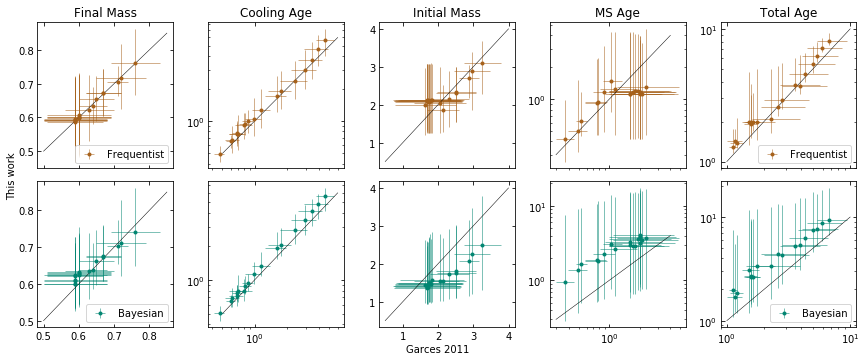

In [38]:
elinewidth = 0.5
color1 = '#a6611a'
color2 = '#018571'
color_line = 'k'
lw = .5
f,((ax9,ax3,ax2,ax4,ax1),(ax10,ax7,ax6,ax8,ax5)) = plt.subplots(2,5,figsize=(12,5), sharex='col')

ax9.errorbar(garces2011['final_mass'],result_garces2011_freq['final_mass_median'],
             xerr=garces2011['e_final_mass'],
             yerr=(result_garces2011_freq['final_mass_err_low'],result_garces2011_freq['final_mass_err_high']), 
             fmt='.',elinewidth = elinewidth, color = color1,
             label='Frequentist')
x = np.linspace(0.5,0.85)
ax9.plot(x,x,'-',color=color_line,linewidth=lw)
ax9.set_title('Final Mass')
ax9.tick_params('both',direction='in',top=True,right=True)
ax9.tick_params('y',which='minor',direction='in',right=True)
ax9.legend(loc=4)

ax10.errorbar(garces2011['final_mass'],result_garces2011_table['final_mass_median'],
             xerr=garces2011['e_final_mass'],
             yerr=(result_garces2011_table['final_mass_err_low'],result_garces2011_table['final_mass_err_high']), 
             fmt='.',elinewidth = elinewidth, color = color2,
             label='Bayesian')
x = np.linspace(0.5,0.85)
ax10.plot(x,x,'-',color=color_line,linewidth=lw)
ax10.tick_params('both',direction='in',top=True,right=True)
ax10.tick_params('y',which='minor',direction='in',right=True)
ax10.legend(loc=4)

ax1.errorbar(garces2011['Age'],result_garces2011_freq['total_age_median']/1e9,
             xerr=(garces2011['e_Age_lo'],garces2011['e_Age_hi']),
             yerr=(result_garces2011_freq['total_age_err_low']/1e9,result_garces2011_freq['total_age_err_high']/1e9), 
             fmt='.',elinewidth = elinewidth, color = color1,
             label='Frequentist')
x = np.linspace(1,10)
ax1.plot(x,x,'-',color=color_line,linewidth=lw)
ax1.set_title('Total Age')
ax1.tick_params('both',direction='in',top=True,right=True)
ax1.tick_params('y',which='minor',direction='in',right=True)
ax1.legend(loc=4)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax5.errorbar(garces2011['Age'],result_garces2011_table['total_age_median'],
             xerr=(garces2011['e_Age_lo'],garces2011['e_Age_hi']),
             yerr=(result_garces2011_table['total_age_err_low'],result_garces2011_table['total_age_err_high']), 
             fmt='.',elinewidth = elinewidth, color = color2,
             label='Bayesian')
x = np.linspace(1,10)
ax5.plot(x,x,'-',color=color_line,linewidth=lw)
ax5.tick_params('both',direction='in',top=True,right=True)
ax5.tick_params('y',which='minor',direction='in',right=True)
ax5.legend(loc=4)
ax5.set_xscale('log')
ax5.set_yscale('log')

ax2.errorbar(garces2011['Minitial_mass'],result_garces2011_freq['initial_mass_median'],
             xerr=garces2011['e_initial_mass'],
             yerr=(result_garces2011_freq['initial_mass_err_low'],result_garces2011_freq['initial_mass_err_high']),
             fmt='.',elinewidth = elinewidth, color = color1)
x = np.linspace(0.5,4)
ax2.plot(x,x,'-',color=color_line,linewidth=lw)
ax2.set_title('Initial Mass')
ax2.tick_params('both',direction='in',top=True,right=True)
ax2.tick_params('y',which='minor',direction='in',right=True)

ax6.errorbar(garces2011['Minitial_mass'],result_garces2011_table['initial_mass_median'],
             xerr=garces2011['e_initial_mass'],
             yerr=(result_garces2011_table['initial_mass_err_low'],result_garces2011_table['initial_mass_err_high']),
             fmt='.',elinewidth = elinewidth, color = color2)
x = np.linspace(0.5,4)
ax6.plot(x,x,'-',color=color_line,linewidth=lw)
ax6.tick_params('both',direction='in',top=True,right=True)
ax6.tick_params('y',which='minor',direction='in',right=True)


ax3.errorbar(garces2011['tcool'],result_garces2011_freq['cooling_age_median']/1e9,
             xerr=garces2011['e_tcool'],
             yerr=(result_garces2011_freq['cooling_age_err_low']/1e9,
                   result_garces2011_freq['cooling_age_err_high']/1e9), 
             fmt='.',elinewidth = elinewidth, color = color1)
x = np.linspace(0.5,6)
ax3.plot(x,x,'-',color=color_line,linewidth=lw)
ax3.set_title('Cooling Age')
ax3.tick_params('both',direction='in',top=True,right=True)
ax3.tick_params('y',which='minor',direction='in',right=True)
ax3.tick_params('both',direction='in',top=True,right=True)
ax3.tick_params('y',which='minor',direction='in',right=True)
ax3.set_xscale('log')
ax3.set_yscale('log')

ax7.errorbar(garces2011['tcool'],result_garces2011_table['cooling_age_median'],
             xerr=garces2011['e_tcool'],
             yerr=(result_garces2011_table['cooling_age_err_low'],result_garces2011_table['cooling_age_err_high']), 
             fmt='.',elinewidth = elinewidth, color = color2)
x = np.linspace(0.5,6)
ax7.plot(x,x,'-',color=color_line,linewidth=lw)
ax7.tick_params('both',direction='in',top=True,right=True)
ax7.tick_params('y',which='minor',direction='in',right=True)
ax7.tick_params('both',direction='in',top=True,right=True)
ax7.tick_params('y',which='minor',direction='in',right=True)
ax7.set_xscale('log')
ax7.set_yscale('log')

ax4.errorbar(garces2011['ms_age'],result_garces2011_freq['ms_age_median']/1e9,
             xerr=(garces2011['e_ms_age_lo'],garces2011['e_ms_age_hi']),
             yerr=(result_garces2011_freq['ms_age_err_low']/1e9,result_garces2011_freq['ms_age_err_high']/1e9),
             fmt='.',elinewidth = elinewidth, color = color1)
x = np.linspace(0.3,4)
ax4.plot(x,x,'-',color=color_line,linewidth=lw)
ax4.set_title('MS Age')
ax4.tick_params('both',direction='in',top=True,right=True)
ax4.tick_params('y',which='minor',direction='in',right=True)
ax4.set_xscale('log')
ax4.set_yscale('log')

ax8.errorbar(garces2011['ms_age'],result_garces2011_table['ms_age_median'],
             xerr=(garces2011['e_ms_age_lo'],garces2011['e_ms_age_hi']),
             yerr=(result_garces2011_table['ms_age_err_low'],result_garces2011_table['ms_age_err_high']),
             fmt='.',elinewidth = elinewidth, color = color2)
x = np.linspace(0.3,4)
ax8.plot(x,x,'-',color=color_line,linewidth=lw)
ax8.tick_params('both',direction='in',top=True,right=True)
ax8.tick_params('y',which='minor',direction='in',right=True)
ax8.set_xscale('log')
ax8.set_yscale('log')

f.text(0.5, 0.01, 'Garces 2011 ', ha='center')
f.text(0.00, 0.5, 'This work', va='center', rotation='vertical')

plt.tight_layout()

# Comparison with BASE-9 Results

In [2]:
original_res_base9 = Table.read('Catalogs/VonHippel/results_compilation.fits')

teff_binaries = np.array(original_res_base9['teff'])
e_teff_binaries = np.array(original_res_base9['e_teff'])
logg_binaries = np.array(original_res_base9['logg'])
e_logg_binaries = np.array(original_res_base9['e_logg'])
total_age = np.array(original_res_base9['total_age'])
e_total_age_lo = np.array(original_res_base9['e_total_age_lo'])
e_total_age_hi = np.array(original_res_base9['e_total_age_hi'])
cooling_age = np.array(original_res_base9['cooling_age'])
e_cooling_age_lo = np.array(original_res_base9['e_cooling_age_lo'])
e_cooling_age_hi = np.array(original_res_base9['e_cooling_age_hi'])
ms_age = np.array(original_res_base9['ms_age'])
e_ms_age_lo = np.array(original_res_base9['e_ms_age_lo'])
e_ms_age_hi = np.array(original_res_base9['e_ms_age_hi'])
initial_mass = np.array(original_res_base9['initial_mass'])
e_initial_mass_lo = np.array(original_res_base9['e_initial_mass_lo'])
e_initial_mass_hi = np.array(original_res_base9['e_initial_mass_hi'])

In [3]:
result_freq = wdwarfdate.calc_wd_age(teff_binaries,e_teff_binaries,logg_binaries,e_logg_binaries,n_mc=2000,
                                       return_distributions=True)
result_base9_table = Table.read('base9_results_bayesian_w_delta_m.fits')

/Users/rociokiman/Documents/wdwarfdate/wdwarfdate/final2initial_mass.py:67: RuntimeWarning: invalid value encountered in less
  mask_neg = initial_mass_dist < 0.1
/Users/rociokiman/Documents/wdwarfdate/wdwarfdate/ms_age.py:20: RuntimeWarning: invalid value encountered in greater
  mask = np.logical_or(np.min(model_initial_mass) > initial_mass_dist_copy,
/Users/rociokiman/Documents/wdwarfdate/wdwarfdate/ms_age.py:21: RuntimeWarning: invalid value encountered in less
  np.max(model_initial_mass) < initial_mass_dist_copy)
/Users/rociokiman/Documents/wdwarfdate/wdwarfdate/wdwarfdate.py:128: RuntimeWarning: invalid value encountered in greater
  mask = np.logical_or(np.logical_or(ms_age_dist/1e9 > 13.8,
/Users/rociokiman/Documents/wdwarfdate/wdwarfdate/wdwarfdate.py:129: RuntimeWarning: invalid value encountered in greater
  total_age_dist/1e9 > 13.8),


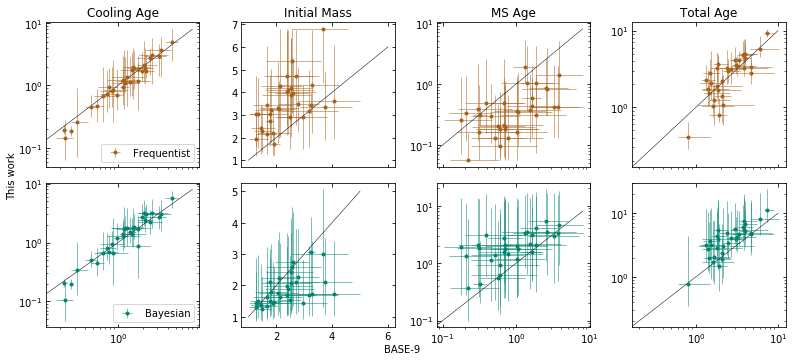

In [4]:
color_line = 'k'
lw = .5
elinewidth = 0.5
color1 = '#a6611a'
color2 = '#018571'

f,((ax3,ax2,ax4,ax1),(ax7,ax6,ax8,ax5)) = plt.subplots(2, 4, figsize=(11,5), sharex = 'col')

ax1.errorbar(total_age,result_freq['total_age_median']/1e9,
             xerr=(e_total_age_lo,e_total_age_hi),
             yerr=(result_freq['total_age_err_low']/1e9,result_freq['total_age_err_high']/1e9), fmt='.',
             elinewidth = elinewidth, color = color1)
x = np.linspace(0,10)
ax1.plot(x,x,'-',color=color_line,linewidth=lw)
ax1.set_title('Total Age')
ax1.tick_params('both',direction='in',top=True,right=True)
ax1.tick_params('y',which='minor',direction='in',right=True)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax5.errorbar(total_age,result_base9_table['total_age_median'],
             xerr=(e_total_age_lo,e_total_age_hi),
             yerr=(result_base9_table['total_age_err_low'],result_base9_table['total_age_err_high']), fmt='.',
             elinewidth = elinewidth, color = color2)

x = np.linspace(0,10)
ax5.plot(x,x,'-',color=color_line,linewidth=lw)
ax5.tick_params('both',direction='in',top=True,right=True)
ax5.tick_params('y',which='minor',direction='in',right=True)
ax5.set_xscale('log')
ax5.set_yscale('log')


ax2.errorbar(initial_mass,result_freq['initial_mass_median'],xerr=(e_initial_mass_lo,e_initial_mass_hi),
             yerr=(result_freq['initial_mass_err_low'],
                   result_freq['initial_mass_err_high']),
             fmt='.', elinewidth = elinewidth, color = color1)
x = np.linspace(1,6)
ax2.plot(x,x,'-',color=color_line,linewidth=lw)
ax2.set_title('Initial Mass')
ax2.tick_params('both',direction='in',top=True,right=True)
ax2.tick_params('y',which='minor',direction='in',right=True)

ax6.errorbar(initial_mass,result_base9_table['initial_mass_median'],xerr=(e_initial_mass_lo,e_initial_mass_hi),
             yerr=(result_base9_table['initial_mass_err_low'],result_base9_table['initial_mass_err_high']),
             fmt='.', elinewidth = elinewidth, color = color2)
x = np.linspace(1,5)
ax6.plot(x,x,'-',color=color_line,linewidth=lw)
ax6.tick_params('both',direction='in',top=True,right=True)
ax6.tick_params('y',which='minor',direction='in',right=True)

ax3.errorbar(cooling_age,result_freq['cooling_age_median']/1e9,
             xerr=(e_cooling_age_lo,e_cooling_age_hi),
             yerr=(result_freq['cooling_age_err_low']/1e9,result_freq['cooling_age_err_high']/1e9), fmt='.',
             elinewidth = elinewidth, color = color1, label = 'Frequentist')
x = np.linspace(0,8)
ax3.plot(x,x,'-',color=color_line,linewidth=lw)
ax3.set_title('Cooling Age')
ax3.tick_params('both',direction='in',top=True,right=True)
ax3.tick_params('y',which='minor',direction='in',right=True)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.legend(loc = 4)

ax7.errorbar(cooling_age,result_base9_table['cooling_age_median'],
             xerr=(e_cooling_age_lo,e_cooling_age_hi),
             yerr=(result_base9_table['cooling_age_err_low'],result_base9_table['cooling_age_err_high']), fmt='.',
             elinewidth = elinewidth, color = color2, label = 'Bayesian')
x = np.linspace(0,8)
ax7.plot(x,x,'-',color=color_line,linewidth=lw)
ax7.tick_params('both',direction='in',top=True,right=True)
ax7.tick_params('y',which='minor',direction='in',right=True)
ax7.set_xscale('log')
ax7.set_yscale('log')
ax7.legend(loc = 4)

ax4.errorbar(ms_age,result_freq['ms_age_median']/1e9,xerr=(e_ms_age_lo,e_ms_age_hi),
             yerr=(result_freq['ms_age_err_low']/1e9,result_freq['ms_age_err_high']/1e9),fmt='.',
             elinewidth = elinewidth, color = color1)
x = np.linspace(0,8)
ax4.plot(x,x,'-',color=color_line,linewidth=lw)
ax4.set_title('MS Age')
ax4.tick_params('both',direction='in',top=True,right=True)
ax4.tick_params('y',which='minor',direction='in',right=True)
ax4.set_xscale('log')
ax4.set_yscale('log')

ax8.errorbar(ms_age,result_base9_table['ms_age_median'],xerr=(e_ms_age_lo,e_ms_age_hi),
             yerr=(result_base9_table['ms_age_err_low'],result_base9_table['ms_age_err_high']),fmt='.',
             elinewidth = elinewidth, color = color2)
x = np.linspace(0,8)
ax8.plot(x,x,'-',color=color_line,linewidth=lw)
ax8.tick_params('both',direction='in',top=True,right=True)
ax8.tick_params('y',which='minor',direction='in',right=True)
ax8.set_xscale('log')
ax8.set_yscale('log')

f.text(0.5, 0.01, 'BASE-9 ', ha='center')
f.text(0.00, 0.5, 'This work', va='center', rotation='vertical')

plt.tight_layout()